# PROJET PYTHON: ANALYSIS OF THE BDD ObesityDataSet_raw_and_data_sinthetic 
# LEONARD DEPORTES & ROMAIN GIRODET

Import basic libraries 

In [3]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Load the data

In [4]:
url = 'https://github.com/Leodespt/Projet_Python/blob/main/ObesityDataSet_raw_and_data_sinthetic.csv?raw=true'
df = pd.read_csv(url)

## Introduction to the database (Romain)

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
print('The data shape : ',df.shape)

The data shape :  (2111, 17)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

______________________________________________________________________________________________________________________________________________________________________________________________________________
## Global Data-visualization (comprehension+cleaning) (LEO)

### Data Cleaning
### Looking for unusable values 
### Number of Null or NaN values of each column of the dataset

In [8]:
for column in df.columns:
    print(column+' : ',df[column].isna().sum()+df[column].isnull().sum())

Gender :  0
Age :  0
Height :  0
Weight :  0
family_history_with_overweight :  0
FAVC :  0
FCVC :  0
NCP :  0
CAEC :  0
SMOKE :  0
CH2O :  0
SCC :  0
FAF :  0
TUE :  0
CALC :  0
MTRANS :  0
NObeyesdad :  0


There are no NaN or Null values in the dataset therefore the data are already ready to be used.

#### Proportion for each variable

##### Proportion of male and female in the dataset

In [9]:
male = len(df.loc[df['Gender'] == 'Male'])
female = len(df.loc[df['Gender'] == 'Female'])

print('Number of males : ',male)
print('Number of females : ',female)

print('\nNumber of peoples : ', female+male)

Number of males :  1068
Number of females :  1043

Number of peoples :  2111


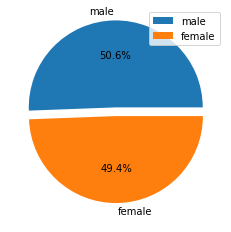

In [10]:
plt.pie([male,female],labels=['male','female'],autopct='%1.1f%%',explode=[0.1,0])
plt.legend()
plt.show()

##### Proportion of smoker and non smoker in the dataset 

In [11]:
smoker = len(df.loc[df['SMOKE'] == 'yes'])
nonsmoker = len(df.loc[df['SMOKE'] == 'no'])

print('Number smokers : ',smoker)
print('Number non smokers : ',nonsmoker)

print('\nNumber of peoples : ', nonsmoker+smoker)

Number smokers :  44
Number non smokers :  2067

Number of peoples :  2111


##### Proportion of people with a family history with overweight in the dataset 

In [12]:
family_history_with_overweight = len(df.loc[df['family_history_with_overweight'] == 'yes'])
family_history_without_overweight = len(df.loc[df['family_history_with_overweight'] == 'no'])

print('Number of people with family history with overweight : ',family_history_with_overweight)
print('Number of people with family history without overweight : ',family_history_without_overweight)

print('\nNumber of peoples : ', family_history_without_overweight+family_history_with_overweight)

Number of people with family history with overweight :  1726
Number of people with family history without overweight :  385

Number of peoples :  2111


##### Proportion of people with calorie’s consumption monitoring in the dataset

In [13]:
SCC_yes = len(df.loc[df['SCC'] == 'yes'])
SCC_no = len(df.loc[df['SCC'] == 'no'])

print('Number of people with a SCC : ',SCC_yes)
print('Number of people without a SCC : ',SCC_no)

print('\nNumber of peoples : ', SCC_no+SCC_yes)

Number of people with a SCC :  96
Number of people without a SCC :  2015

Number of peoples :  2111


##### Proportion of people with frequent consumption of high caloric food in the dataset

In [14]:
FAVC_yes = len(df.loc[df['FAVC'] == 'yes'])
FAVC_no = len(df.loc[df['FAVC'] == 'no'])

print('Number of people with a FAVC : ',FAVC_yes)
print('Number of people without a FAVC : ',FAVC_no)

print('\nNumber of peoples : ', FAVC_no+FAVC_yes)

Number of people with a FAVC :  1866
Number of people without a FAVC :  245

Number of peoples :  2111


##### Summary of the proportion of the 4 yes or no variables (via pieplots)

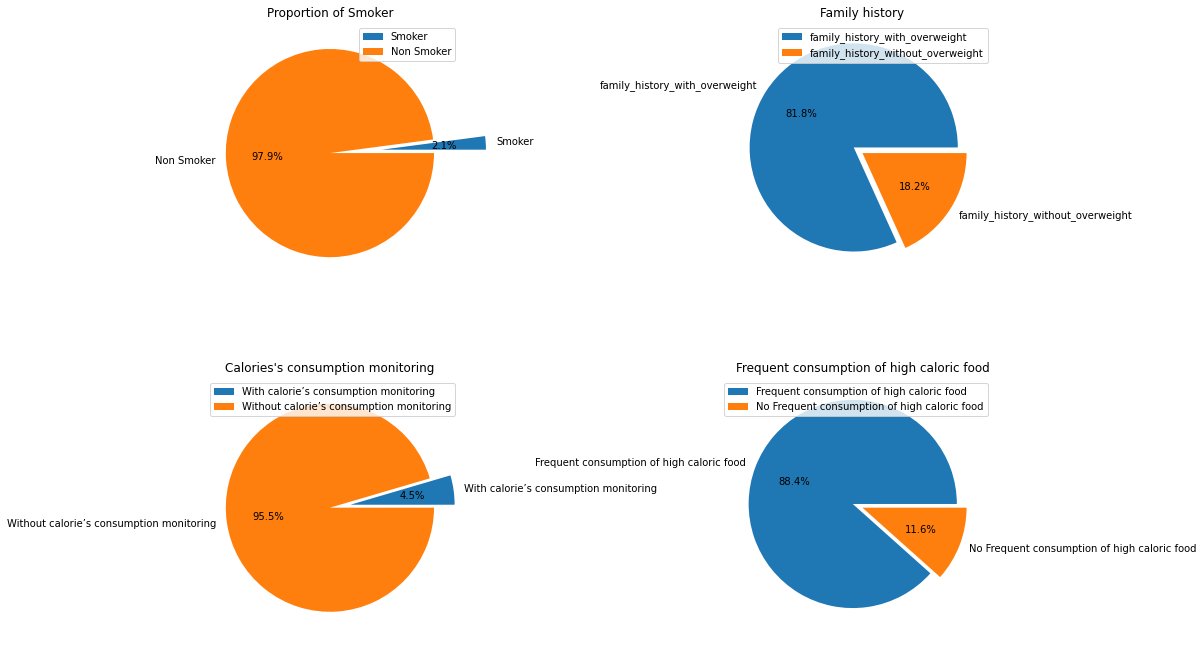

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].pie([smoker,nonsmoker],labels=['Smoker','Non Smoker'], autopct='%1.1f%%',explode=[0.5,0])
ax[0][0].set_title('Proportion of Smoker')

ax[0][1].pie([family_history_with_overweight,family_history_without_overweight],
    labels=['family_history_with_overweight','family_history_without_overweight'], 
    autopct='%1.1f%%',explode=[0.1,0])
ax[0][1].set_title('Family history')

ax[1][0].pie([SCC_yes,SCC_no],
    labels=['With calorie’s consumption monitoring','Without calorie’s consumption monitoring'],
    autopct='%1.1f%%',explode=[0.2,0])
ax[1][0].set_title("Calories's consumption monitoring")

ax[1][1].pie([FAVC_yes,FAVC_no],
    labels=['Frequent consumption of high caloric food','No Frequent consumption of high caloric food'], 
    autopct='%1.1f%%',explode=[0.1,0])
ax[1][1].set_title('Frequent consumption of high caloric food')


ax[0][0].legend() 
ax[0][1].legend() 
ax[1][0].legend() 
ax[1][1].legend() 

plt.tight_layout()

##### Proportion of the different transport used by our dataset

In [16]:
Automobile = len(df.loc[df['MTRANS'] == 'Automobile'])
Motorbike = len(df.loc[df['MTRANS'] == 'Motorbike'])
Bike = len(df.loc[df['MTRANS'] == 'Bike'])
Public_Transportation  = len(df.loc[df['MTRANS'] == 'Public_Transportation'])
Walking = len(df.loc[df['MTRANS'] == 'Walking'])

print('Number Automobile : ', Automobile)
print('Number Motorbike : ',Motorbike)
print('Number Bike : ', Bike)
print('Number Public_Transportation : ',Public_Transportation)
print('Number Walking : ',Walking)

print('\nNumber of peoples : ', Automobile+Motorbike+Bike+Public_Transportation+Walking)

Number Automobile :  457
Number Motorbike :  11
Number Bike :  7
Number Public_Transportation :  1580
Number Walking :  56

Number of peoples :  2111


##### Proportion of consumption of food between meals by our dataset

In [17]:
CAEC_no = len(df.loc[df['CAEC'] == 'no'])
CAEC_Sometimes = len(df.loc[df['CAEC'] == 'Sometimes'])
CAEC_Frequently = len(df.loc[df['CAEC'] == 'Frequently'])
CAEC_Always = len(df.loc[df['CAEC'] == 'Always'])

print('Number of no : ', CAEC_no)
print('Number of Sometimes : ', CAEC_Sometimes)
print('Number of Frequently : ', CAEC_Frequently)
print('Number of Always : ',CAEC_Always)

print('\nNumber of peoples : ', CAEC_no+CAEC_Sometimes+CAEC_Frequently+CAEC_Always)

Number of no :  51
Number of Sometimes :  1765
Number of Frequently :  242
Number of Always :  53

Number of peoples :  2111


##### Proportion of consumption of alcohol by our dataset

In [18]:
CALC_no = len(df.loc[df['CALC'] == 'no'])
CALC_Sometimes = len(df.loc[df['CALC'] == 'Sometimes'])
CALC_Frequently = len(df.loc[df['CALC'] == 'Frequently'])
CALC_Always = len(df.loc[df['CALC'] == 'Always'])

print('Number of no : ', CALC_no)
print('Number of Sometimes : ', CALC_Sometimes)
print('Number of Frequently : ', CALC_Frequently)
print('Number of Always : ',CALC_Always)

print('\nNumber of peoples : ', CALC_no+CALC_Sometimes+CALC_Frequently+CALC_Always)

Number of no :  639
Number of Sometimes :  1401
Number of Frequently :  70
Number of Always :  1

Number of peoples :  2111


##### Proportion of the target variable of our dataset

In [19]:
Insufficient_Weight = len(df.loc[df['NObeyesdad'] == 'Insufficient_Weight'])
Normal_Weight = len(df.loc[df['NObeyesdad'] == 'Normal_Weight'])
Overweight_Level_I = len(df.loc[df['NObeyesdad'] == 'Overweight_Level_I'])
Overweight_Level_II  = len(df.loc[df['NObeyesdad'] == 'Overweight_Level_II'])
Obesity_Type_I = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_I'])
Obesity_Type_II = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_II'])
Obesity_Type_III = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_III'])

print('Number of people with Insufficient Weight : ',Insufficient_Weight)
print('Number of people with Normal Weight : ',Normal_Weight)
print('Number of people with Overweight_Level_I : ', Overweight_Level_I)
print('Number of people with Overweight_Level_II : ',Overweight_Level_II)
print('Number of people with Obesity_Type_I : ',Obesity_Type_I)
print('Number of people with Obesity_Type_II : ',Obesity_Type_II)
print('Number of people with Obesity_Type_III : ',Obesity_Type_III)

print('\nNumber of peoples : ', Insufficient_Weight+Normal_Weight+ Overweight_Level_I+Overweight_Level_II+Obesity_Type_I+Obesity_Type_II+Obesity_Type_III)

Number of people with Insufficient Weight :  272
Number of people with Normal Weight :  287
Number of people with Overweight_Level_I :  290
Number of people with Overweight_Level_II :  290
Number of people with Obesity_Type_I :  351
Number of people with Obesity_Type_II :  297
Number of people with Obesity_Type_III :  324

Number of peoples :  2111


##### Summary of the different variables of the dataset (via barplot)

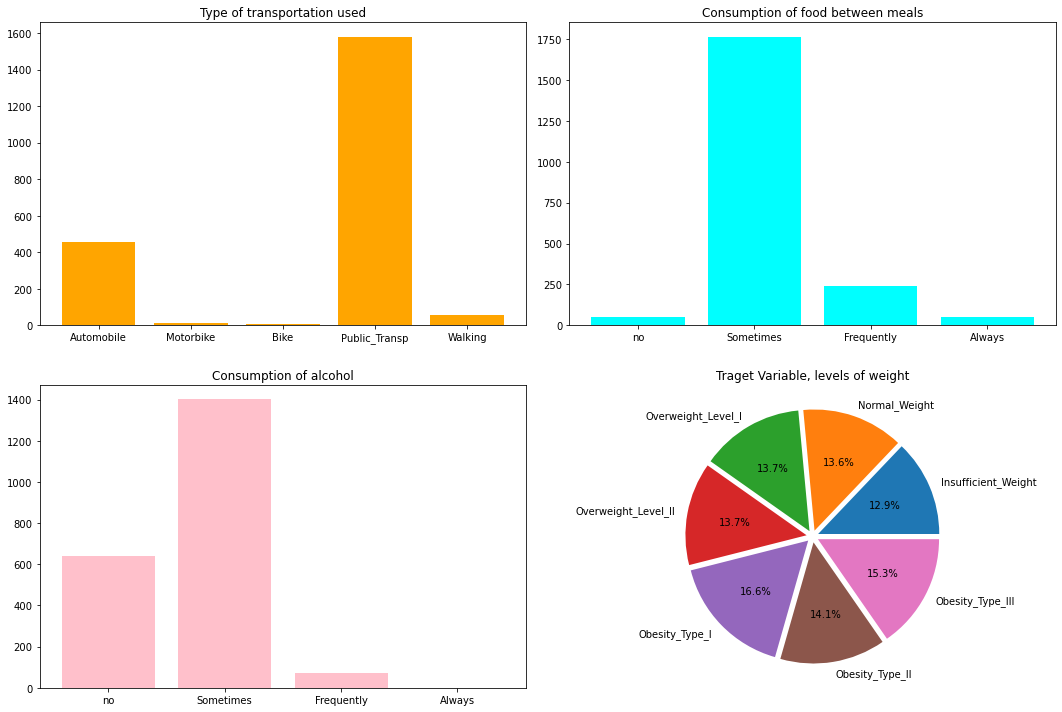

In [20]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].bar(['Automobile','Motorbike','Bike','Public_Transp','Walking'],
    [Automobile,Motorbike,Bike,Public_Transportation,Walking],
    color = 'orange')
ax[0][0].set_title('Type of transportation used')

ax[0][1].bar(['no','Sometimes','Frequently','Always'],
    [CAEC_no,CAEC_Sometimes,CAEC_Frequently,CAEC_Always], 
    color = 'cyan')
ax[0][1].set_title('Consumption of food between meals')

ax[1][0].bar(['no','Sometimes','Frequently','Always'],
    [CALC_no,CALC_Sometimes,CALC_Frequently,CALC_Always], 
    color = 'pink')
ax[1][0].set_title("\nConsumption of alcohol")

ax[1][1].pie([Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III],
    labels=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],
    autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05])
ax[1][1].set_title('\nTraget Variable, levels of weight')

plt.tight_layout()

#### Obesity level according to age, weight and height

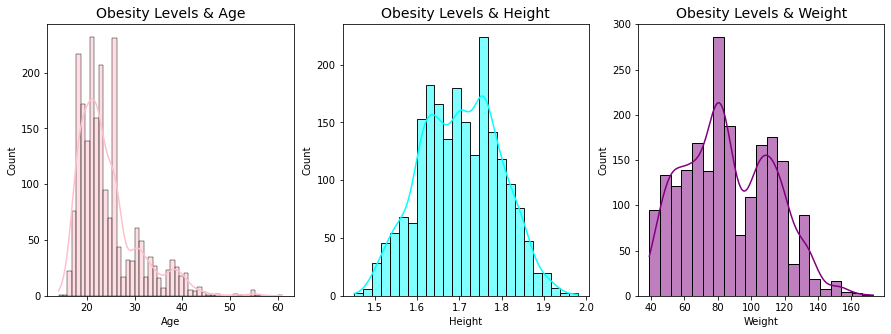

In [21]:
fig, ax = plt.subplots(1, 3 ,figsize =(15,5))

sns.histplot(df['Age'], ax = ax[0] , color = 'pink', kde=True)
ax[0].set_title('Obesity Levels & Age', fontsize = 14)

sns.histplot(df['Height'], ax = ax[1] , color = 'cyan', kde=True)
ax[1].set_title('Obesity Levels & Height' , fontsize = 14)

sns.histplot(df['Weight'], ax = ax[2] , color = 'purple', kde=True)
ax[2].set_title('Obesity Levels & Weight' , fontsize = 14)

plt.show()

______________________________________________________________________________________________________________________________________________________________________________________________________________

#### Correlation Matrix (use of seaborn)

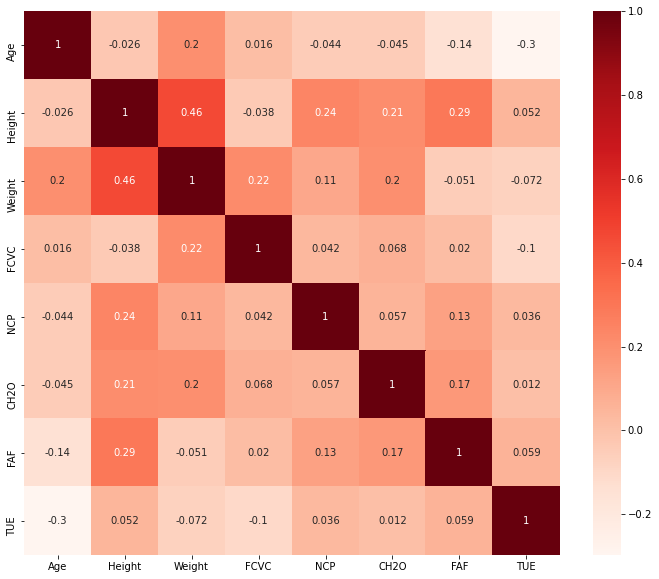

In [22]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

___________________________________________________________________________________________________________________________________________________________________________________________________

## Local Data-visualization: studies  of the different obesity type groups (ROMAIN)

In [23]:
print("Insufficient_Weight \nNormal_Weight \nObesity_Type_I \nObesity_Type_II \nObesity_Type_III \nOverweight_Level_I\nOverweight_Level_II")

Insufficient_Weight 
Normal_Weight 
Obesity_Type_I 
Obesity_Type_II 
Obesity_Type_III 
Overweight_Level_I
Overweight_Level_II


In [24]:
def visualization_ID_Variable(obesity_variable,df):
     df_obesity=df[df["NObeyesdad"]==obesity_variable]
     # #Condition where remplit les lignes ne respectant pas les conditions avec des NaN, on les supprime ensuite avec dropna(). 
     df_obesity=df[["Gender","Age","Height","Weight","family_history_with_overweight"]].where(df["NObeyesdad"]==obesity_variable).dropna()
     df_obesity_Female=df_obesity[["Age","Height","Weight","family_history_with_overweight"]].where(df_obesity["Gender"]=="Female").dropna()
     df_obesity_Male=df_obesity[["Age","Height","Weight","family_history_with_overweight"]].where(df_obesity["Gender"]=="Male").dropna()


     fg, ax =plt.subplots(3,4,figsize=(30,16))
     df_obesity.boxplot(df_obesity.columns.tolist()[1],showmeans=True,ax=ax[0,0])
     df_obesity.boxplot(df_obesity.columns.tolist()[2],showmeans=True,ax=ax[1,0])
     df_obesity.boxplot(df_obesity.columns.tolist()[3],showmeans=True,ax=ax[2,0])
     sns.countplot(x="Gender", hue="family_history_with_overweight", data=df_obesity,ax=ax[0,3])

     df_obesity_Female.boxplot(df_obesity_Female.columns.tolist()[0],showmeans=True,ax=ax[0,1])
     df_obesity_Female.boxplot(df_obesity_Female.columns.tolist()[1],showmeans=True,ax=ax[1,1])
     df_obesity_Female.boxplot(df_obesity_Female.columns.tolist()[2],showmeans=True,ax=ax[2,1])
     sns.countplot(x="family_history_with_overweight", data=df_obesity_Female,ax=ax[1,3])

     df_obesity_Male.boxplot(df_obesity_Male.columns.tolist()[0],showmeans=True,ax=ax[0,2])
     df_obesity_Male.boxplot(df_obesity_Male.columns.tolist()[1],showmeans=True,ax=ax[1,2])
     df_obesity_Male.boxplot(df_obesity_Male.columns.tolist()[2],showmeans=True,ax=ax[2,2])
     sns.countplot(x="family_history_with_overweight", data=df_obesity_Male,ax=ax[2,3])


     ax[0,0].set_title("Female  and male Age with "+obesity_variable)
     ax[0,0].set_ylabel('Age in years  ')

     ax[1,0].set_title('Female and male Height with '+obesity_variable)
     ax[1,0].set_ylabel('Height in cm ')

     ax[2,0].set_title('Female and male Weight with '+obesity_variable)
     ax[2,0].set_ylabel('Weight in Kg')
     ax[0,3].set_title('Countplot of female and male  with '+obesity_variable+' in fonction of their family history with alcohol')


     ax[0,1].set_title('Female Age with '+obesity_variable)
     ax[0,1].set_ylabel('Age in years  ')

     ax[1,1].set_title('Female Height with '+obesity_variable)
     ax[1,1].set_ylabel('Height in cm ')

     ax[2,1].set_title('Female Weight with '+obesity_variable)
     ax[2,1].set_ylabel('Weight in Kg')
     ax[1,3].set_title('Countplot of female  with '+obesity_variable+' in fonction of their family history with alcohol')


     ax[0,2].set_title('Male Age with '+obesity_variable)
     ax[0,2].set_ylabel('Age in years  ')

     ax[1,2].set_title('Male Height with '+obesity_variable)
     ax[1,2].set_ylabel('Height in cm ')

     ax[2,2].set_title('Male Weight with '+obesity_variable)
     ax[2,2].set_ylabel('Weight in Kg')
     ax[2,3].set_title('Countplot of male  with '+obesity_variable+' in fonction of their family history with alcohol')
   


    

In [25]:
def visualization_ID_Variable_Table(obesity_variable,df):
    df_obesity=df[df["NObeyesdad"]==obesity_variable]
    df_obesity=df[["Gender","Age","Height","Weight","family_history_with_overweight"]].where(df["NObeyesdad"]==obesity_variable).dropna()
    df_obesity_Female=df_obesity[["Age","Height","Weight","family_history_with_overweight"]].where(df_obesity["Gender"]=="Female").dropna()
    df_obesity_Male=df_obesity[["Age","Height","Weight","family_history_with_overweight"]].where(df_obesity["Gender"]=="Male").dropna()


    print("Informations about Males and Females in Insufficient_Weight:\n ",df_obesity.describe(),"\n\nInformations about Females in Insufficient_Weight:\n",df_obesity_Female.describe(),"\n\nInformations about Males  in Insufficient_Weight:\n",df_obesity_Male.describe())

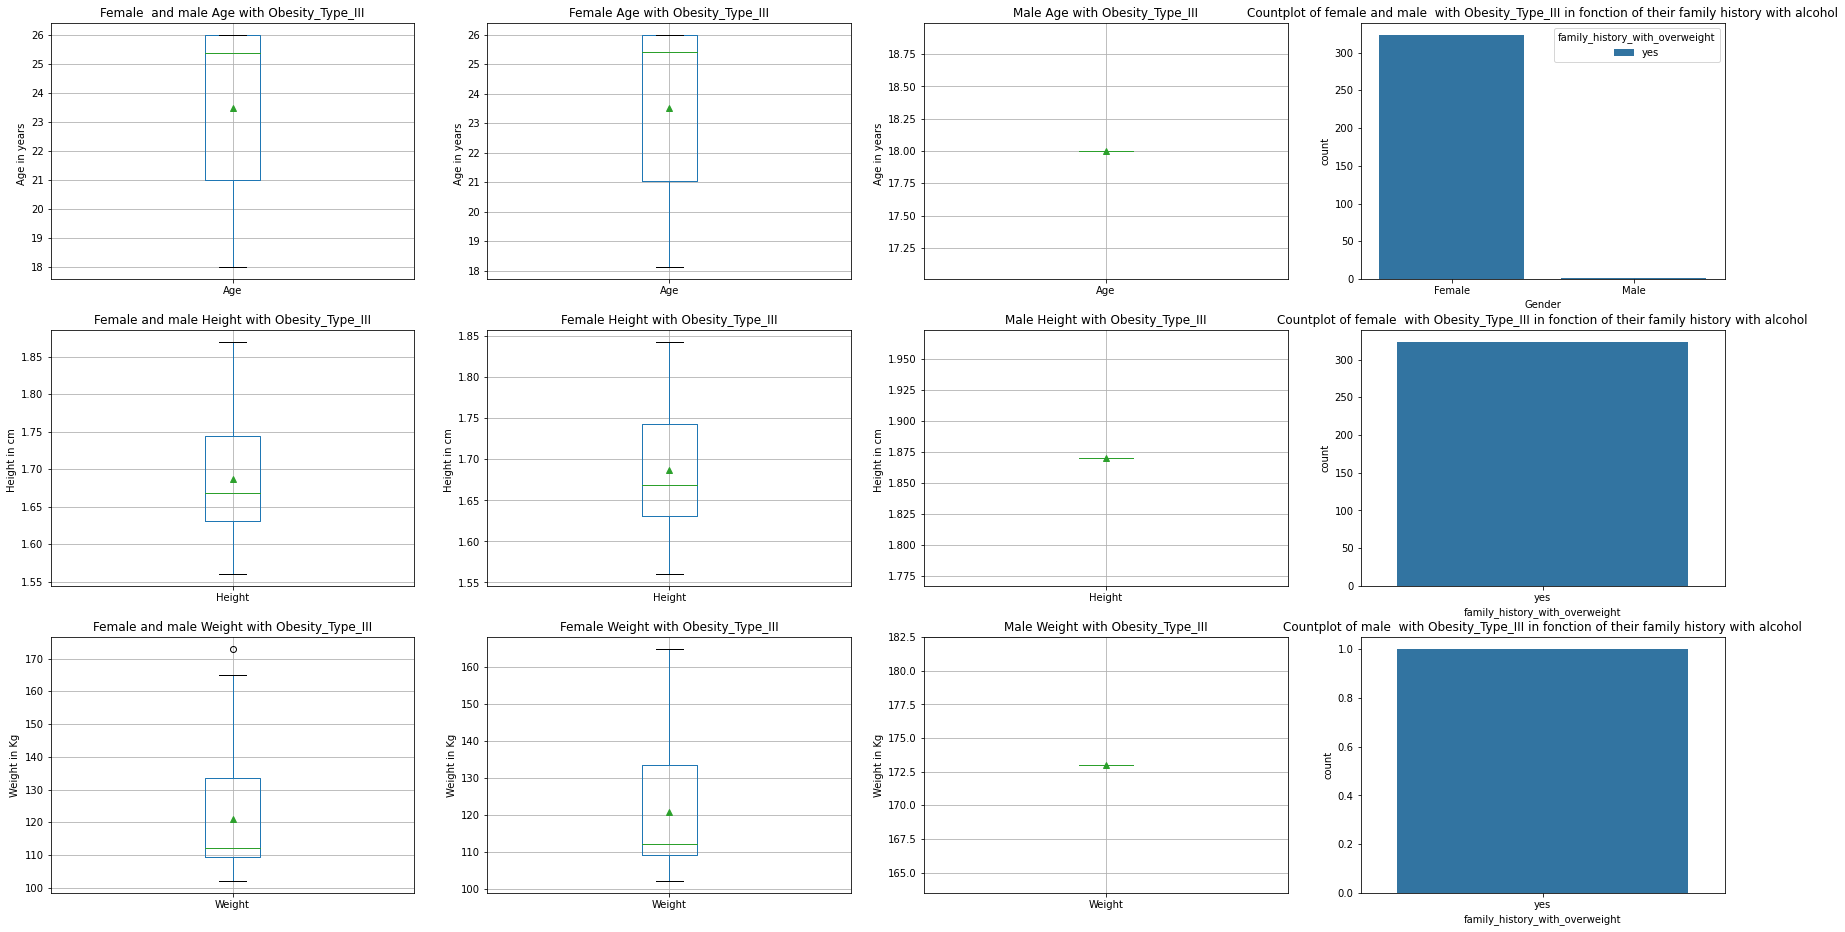

In [26]:
#OBSERVE ONE OF THSES CATEGORIES

#  Insufficient_Weight 
# Normal_Weight 
# Obesity_Type_I 
# Obesity_Type_II 
# Obesity_Type_III 
# Overweight_Level_I
# Overweight_Level_II

visualization_ID_Variable("Obesity_Type_III",df)
 



In [27]:
#OBSERVE ONE OF THSES CATEGORIES

#  Insufficient_Weight 
# Normal_Weight 
# Obesity_Type_I 
# Obesity_Type_II 
# Obesity_Type_III 
# Overweight_Level_I
# Overweight_Level_II


visualization_ID_Variable_Table("Insufficient_Weight",df)

Informations about Males and Females in Insufficient_Weight:
                Age      Height      Weight
count  272.000000  272.000000  272.000000
mean    19.783237    1.691117   49.906330
std      2.669511    0.099687    6.010708
min     16.000000    1.520000   39.000000
25%     18.000000    1.599268   44.656545
50%     19.244594    1.704180   50.000000
75%     21.000000    1.758308   53.667843
max     39.000000    1.900000   65.000000 

Informations about Females in Insufficient_Weight:
               Age      Height      Weight
count  173.000000  173.000000  173.000000
mean    20.507997    1.639931   46.687502
std      2.854530    0.080797    4.306843
min     16.270434    1.520000   39.000000
25%     19.000000    1.567981   42.006282
50%     19.880360    1.646030   46.062954
75%     21.813083    1.708406   50.000000
max     39.000000    1.830068   56.265959 

Informations about Males  in Insufficient_Weight:
              Age     Height     Weight
count  99.000000  99.000000  99.000

In [28]:
df.describe()
df.groupby(by="CALC").size()

CALC
Always           1
Frequently      70
Sometimes     1401
no             639
dtype: int64

______________________________________________________________________________________________________________________________________________________________________________________________________________
## Modeling: Classification of the type of Obesity using all the features




### First step : turn the qualitative data into quantitative data : Data encodage

##### Manual encodage

Gender 
* male = 0
* female = 1

In [29]:
df.Gender.replace(('Male','Female'),(1,2), inplace = True)

Family_history_with_overweight

FCHCF (Frequent consumption of high caloric food)

SMOKE

SCC (Calorie’s consumption monitoring)

- yes = 1
- no = 0

In [30]:
df.family_history_with_overweight.replace(('yes','no'),(1,0), inplace = True)
df.FAVC.replace(('yes','no'),(1,0), inplace = True)
df.SMOKE.replace(('yes','no'),(1,0), inplace = True)
df.SCC.replace(('yes','no'),(1,0), inplace = True)

CAEC (Consumption of food between meals)

CALC (Consumption of alcohol)
* no = 0
* Sometimes = 1
* Frequently = 2
* Always = 3

In [31]:
df.CAEC.replace(('no','Sometimes','Frequently','Always'),(0,1,2,3), inplace = True)
df.CALC.replace(('no','Sometimes','Frequently','Always'),(0,1,2,3), inplace = True)

MTRANS (Transportation used)
* Automobile = 0
* Motorbike = 1
* Bike = 2
* Public_Transportation = 3
* Walking = 4

In [32]:
df.MTRANS.replace(('Automobile','Motorbike','Bike','Public_Transportation','Walking'),(0,1,2,3,4), inplace = True)

NObeyesdad (target variable) 
* Insufficient Weight = 0
* Normal Weight = 1
* Overweight level I = 2
* Overweight level II = 3
* Obesity Type I = 4 
* Obesity type II = 5
* Obesity Type III = 6.


In [33]:
df.NObeyesdad.replace(('Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),(0,1,2,3,4,5,6), inplace = True)

In [34]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,2,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


##### Ordinal Encodage

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
columns = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS","NObeyesdad"]
df[columns] = ord_enc.fit_transform(df[columns])
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,1.0
1,1.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,3.0,1.0
2,0.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,1.0
3,0.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,4.0,2.0
4,0.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,3.0


#### Label Encodage

In [36]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df["family_history_with_overweight"] = df["family_history_with_overweight"].astype('category').cat.codes
df["FAVC"] = df["FAVC"].astype('category').cat.codes
df["CAEC"] = df["CAEC"].astype('category').cat.codes
df["SMOKE"] = df["SMOKE"].astype('category').cat.codes
df["SCC"] = df["SCC"].astype('category').cat.codes
df["CALC"] = df["CALC"].astype('category').cat.codes
df["MTRANS"] = df["MTRANS"].astype('category').cat.codes
df["NObeyesdad"] = df["NObeyesdad"].astype('category').cat.codes
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


### Second step : Split the data into a training set and a test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
Y=df["NObeyesdad"] 
X=df.loc[:,df.columns!="NObeyesdad"]

#avant de séparer on mélange avec random_state

X_train, X_test,Y_train,Y_test=train_test_split(X, Y, test_size= 0.33,random_state=4)

print( '\ntrain set', X_train.shape,'test set', X_test.shape)
print( '\ntrain set', Y_train.shape,'test set', Y_test.shape)


train set (1414, 16) test set (697, 16)

train set (1414,) test set (697,)


#### We scale the data to have more precise results

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Third step : Creation of the models

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#### K-neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model_k=KNeighborsClassifier()
model_k.fit(X_train,Y_train)


KNeighborsClassifier()

#### SVC : Support Vector Classification

In [43]:
from sklearn.svm import SVC

In [44]:
model_svc=SVC(probability=True)
model_svc.fit(X_train,Y_train)


SVC(probability=True)

#### Grid SVC : Grid Support Vector Classification

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'C' : [150,200,250], 'gamma':[0.02,0.025,0.01]}
grid_svc = GridSearchCV(model_svc,parameters,cv=5)
grid_svc.fit(X_train,Y_train)
print(grid_svc.best_score_,grid_svc.best_estimator_)

0.9483622785254241 SVC(C=200, gamma=0.01, probability=True)


#### BAGGING Classifiers

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

Bagging=BaggingClassifier()
RandomForest=RandomForestClassifier()

Bagging.fit(X_train,Y_train)

print("train score: ",Bagging.score(X_train,Y_train))
print("test score: ",Bagging.score(X_test,Y_test))

RandomForest.fit(X_train,Y_train)

print("train score: ",RandomForest.score(X_train,Y_train))
print("test score: ",RandomForest.score(X_test,Y_test))

train score:  0.9957567185289957
test score:  0.9340028694404591
train score:  1.0
test score:  0.9469153515064562


#### BOOSTING Classifiers

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
AdaBoost=AdaBoostClassifier()
GradientBoosting=GradientBoostingClassifier()
HistGradientBoosting=HistGradientBoostingClassifier()

AdaBoost.fit(X_train,Y_train)

print("train score: ",AdaBoost.score(X_train,Y_train))
print("test score: ",AdaBoost.score(X_test,Y_test))

GradientBoosting.fit(X_train,Y_train)

print("train score: ",GradientBoosting.score(X_train,Y_train))
print("test score: ",GradientBoosting.score(X_test,Y_test))

HistGradientBoosting.fit(X_train,Y_train)

print("train score: ",HistGradientBoosting.score(X_train,Y_train))
print("test score: ",HistGradientBoosting.score(X_test,Y_test))


train score:  0.2765205091937765
test score:  0.2783357245337159
train score:  1.0
test score:  0.9526542324246772
train score:  1.0
test score:  0.9684361549497847


#### STACKING Classifiers

In [49]:
#NOUS AVONS CHOISI DE LAISSER CE CLASSIFIER DE COTE

# from sklearn.ensemble import StackingClassifier


# Stacking=StackingClassifier()

# Stacking.fit(X_train_reduiced,Y_train_reduiced)

# print("train score: ",Stacking.score(X_train_reduiced,Y_train_reduiced))
# print("test score: ",Stacking.score(X_test_reduiced,Y_test_reduiced))

### Fourth step : Test the different classifier/models 

In [50]:
Y_pred_k = model_k.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_k)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_k)))

[[ 85   5   0   1   0   0   0]
 [ 26  44  11  12   9   1   0]
 [  3   4  76   4   4   0   0]
 [  1   7  14  70   5   4   1]
 [  0   1   4   1  83   5   1]
 [  0   2   2   2   1  98   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.812051649928264


In [51]:
Y_pred_svc = model_svc.predict(X_test)

cm_svc = confusion_matrix(Y_test,Y_pred_svc)
print(cm_svc)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_svc)))

[[ 82   9   0   0   0   0   0]
 [  8  78  11   5   1   0   0]
 [  1   9  79   1   1   0   0]
 [  0  10  15  73   4   0   0]
 [  0   4   1   0  87   3   0]
 [  0   3   0   0   3  99   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.8723098995695839


In [52]:
Y_pred_grid_svc = grid_svc.predict(X_test)

cm_grid_svc = confusion_matrix(Y_test,Y_pred_grid_svc)
print(cm_grid_svc)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_grid_svc)))

[[ 84   7   0   0   0   0   0]
 [  4  89   9   1   0   0   0]
 [  0   5  85   1   0   0   0]
 [  0   0   5  94   3   0   0]
 [  0   0   1   1  93   0   0]
 [  0   0   0   2   1 102   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9426111908177905


In [53]:
Y_pred_Bagging = Bagging.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_Bagging)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_Bagging)))


[[ 87   4   0   0   0   0   0]
 [  9  85   8   1   0   0   0]
 [  0   5  80   6   0   0   0]
 [  0   0   2  96   4   0   0]
 [  0   0   0   3  91   1   0]
 [  0   0   0   1   1 102   1]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9340028694404591


In [54]:
Y_pred_RandomForest = RandomForest.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_RandomForest)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_RandomForest)))

[[ 85   6   0   0   0   0   0]
 [  1  95   5   2   0   0   0]
 [  0   8  82   0   1   0   0]
 [  0   3   5  93   1   0   0]
 [  0   0   1   2  91   1   0]
 [  0   1   0   0   0 104   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9469153515064562


In [55]:
Y_pred_AdaBoost = AdaBoost.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_AdaBoost)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_AdaBoost)))

[[  3  88   0   0   0   0   0]
 [  0  50  20  33   0   0   0]
 [  0   3  17  71   0   0   0]
 [  0   0   6  93   3   0   0]
 [  0   0   0  64  31   0   0]
 [  0   0   0  12  93   0   0]
 [  0   0   0   0 110   0   0]]

Accuracy : 0.2783357245337159


In [56]:
Y_pred_GradientBoosting = GradientBoosting.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_GradientBoosting)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_GradientBoosting)))

[[ 88   3   0   0   0   0   0]
 [  3  96   4   0   0   0   0]
 [  0   2  86   3   0   0   0]
 [  0   0  12  88   2   0   0]
 [  0   0   0   2  92   1   0]
 [  0   0   0   0   1 104   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9526542324246772


In [57]:
Y_pred_HistGradientBoosting = HistGradientBoosting.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_HistGradientBoosting)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_HistGradientBoosting)))

[[ 87   4   0   0   0   0   0]
 [  0 100   3   0   0   0   0]
 [  0   1  87   3   0   0   0]
 [  0   0   3  96   3   0   0]
 [  0   0   0   3  91   1   0]
 [  0   0   0   0   1 104   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9684361549497847


#### Summery of the different accuracies

In [58]:
print('\nAccuracy with K-neighbors model : '+ str(round(accuracy_score(Y_test,Y_pred_k),3))+' %')
print('\nAccuracy with SVC model: '+ str(round(accuracy_score(Y_test,Y_pred_svc),3))+' %')
print('\nAccuracy with Grid SVC model : '+ str(round(accuracy_score(Y_test,Y_pred_grid_svc),3))+' %')

print('\nAccuracy with Bagging model : '+ str(round(accuracy_score(Y_test,Y_pred_Bagging),3))+' %')
print('\nAccuracy with RandomForest model : '+ str(round(accuracy_score(Y_test,Y_pred_RandomForest),3))+' %')
print('\nAccuracy with AdaBoost model : '+ str(round(accuracy_score(Y_test,Y_pred_AdaBoost),3))+' %')
print('\nAccuracy with GradientBoosting model : '+ str(round(accuracy_score(Y_test,Y_pred_GradientBoosting),3))+' %')
print('\nAccuracy with HistGradientBoosting model : '+ str(round(accuracy_score(Y_test,Y_pred_HistGradientBoosting),3))+' %')




Accuracy with K-neighbors model : 0.812 %

Accuracy with SVC model: 0.872 %

Accuracy with Grid SVC model : 0.943 %

Accuracy with Bagging model : 0.934 %

Accuracy with RandomForest model : 0.947 %

Accuracy with AdaBoost model : 0.278 %

Accuracy with GradientBoosting model : 0.953 %

Accuracy with HistGradientBoosting model : 0.968 %


### VOTING Classifier

In [59]:
# liste_classifier_KEY=[('Bagging'),('RandomForest'),('GradientBoosting'),('HistGradientBoosting')]
# liste_classifier_VALUE=[(Bagging),(RandomForest),(GradientBoosting),(HistGradientBoosting)]

liste_classifier_KEY=[('model_svc'),('model_k'),('Bagging'),('RandomForest'),('GradientBoosting'),('HistGradientBoosting')]
liste_classifier_VALUE=[(model_svc),(model_k),(Bagging),(RandomForest),(GradientBoosting),(HistGradientBoosting)]


liste_classifier=list(zip(liste_classifier_KEY,liste_classifier_VALUE))

from sklearn.ensemble import VotingClassifier


VotingHard=VotingClassifier(estimators=liste_classifier,voting="hard")
VotingSoft=VotingClassifier(estimators=liste_classifier,voting="soft")



VotingHard.fit(X_train,Y_train)
VotingSoft.fit(X_train,Y_train)


VotingClassifier(estimators=[('model_svc', SVC(probability=True)),
                             ('model_k', KNeighborsClassifier()),
                             ('Bagging', BaggingClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('GradientBoosting', GradientBoostingClassifier()),
                             ('HistGradientBoosting',
                              HistGradientBoostingClassifier())],
                 voting='soft')

In [60]:
Y_pred_VotingHard = VotingHard.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_VotingHard)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_VotingHard)))

[[ 89   2   0   0   0   0   0]
 [  3  98   2   0   0   0   0]
 [  1   5  85   0   0   0   0]
 [  0   2   8  91   1   0   0]
 [  0   0   1   1  92   1   0]
 [  0   1   0   0   0 104   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9598278335724534


In [61]:
Y_pred_VotingSoft = VotingSoft.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_VotingSoft)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_VotingSoft)))


Y_pred_VotingHard = VotingHard.predict(X_test)

cm_k = confusion_matrix(Y_test,Y_pred_VotingHard)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_VotingHard)))



[[ 86   5   0   0   0   0   0]
 [  1 100   2   0   0   0   0]
 [  0   4  85   2   0   0   0]
 [  0   0   5  96   1   0   0]
 [  0   0   1   0  93   1   0]
 [  0   0   0   0   1 104   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9670014347202296
[[ 89   2   0   0   0   0   0]
 [  3  98   2   0   0   0   0]
 [  1   5  85   0   0   0   0]
 [  0   2   8  91   1   0   0]
 [  0   0   1   1  92   1   0]
 [  0   1   0   0   0 104   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9598278335724534


In [62]:
print('\nAccuracy with VotingHard model : '+ str(round(accuracy_score(Y_test,Y_pred_VotingHard),3))+' %')
print('\nAccuracy with VotingSoft model : '+ str(round(accuracy_score(Y_test,Y_pred_VotingSoft),3))+' %')



Accuracy with VotingHard model : 0.96 %

Accuracy with VotingSoft model : 0.967 %


------------------------------------------------------------------------------------------------------------------------
## Modeling: Classification of the type of Obesity using only significants features

We can look at the correlation matrix of the encoded data to see which columns/variables are the more correlated to our target variable

### Correlation matrix after encoding

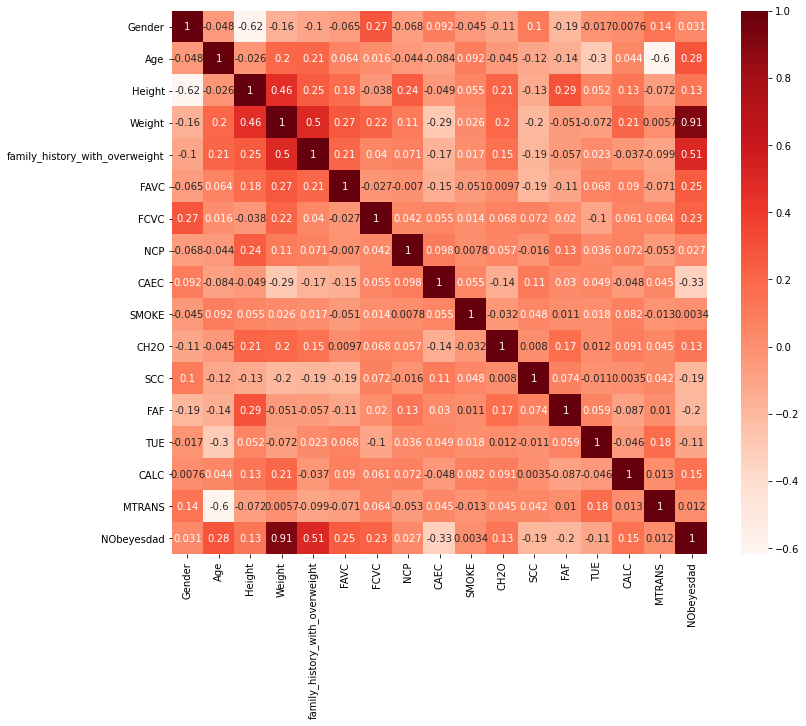

In [63]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Looking at the correlation matrix, we decided to drop the variables with a correlation with our target variable under 0,15. This would enable us to use only very correlated variables and be more precise in our prediction.

In [64]:
column = ["NObeyesdad","Gender","NCP","CAEC","SMOKE","SCC","FAF","TUE","MTRANS","CH2O"]

In [65]:
Y_reduiced =df["NObeyesdad"]
X_reduiced = df.drop(column,1)

#avant de séparer on mélange avec random_state

X_train_reduiced, X_test_reduiced,Y_train_reduiced,Y_test_reduiced = train_test_split(X_reduiced, Y_reduiced, test_size= 0.33,random_state=4)

print( '\ntrain set', X_train_reduiced.shape,'test set', X_test_reduiced.shape)
print( '\ntrain set', Y_train_reduiced.shape,'test set', Y_test_reduiced.shape)


train set (1414, 7) test set (697, 7)

train set (1414,) test set (697,)


In [66]:
X_reduiced.head()

type(X_reduiced["CALC"][0])

numpy.int8

### We scale the data to have more precise results

In [67]:
scaler.fit(X_train_reduiced)
X_train_reduiced = scaler.transform(X_train_reduiced)
X_test_reduiced = scaler.transform(X_test_reduiced)

### We decided to try this method on the best performant models: SVC and GridSeach + Voting classifier

#### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model_k_reduiced=KNeighborsClassifier()
model_k_reduiced.fit(X_train,Y_train)

KNeighborsClassifier()

<!-- #### KNN -->

#### SVC : Support Vector Classification

In [69]:
from sklearn.svm import SVC

In [70]:
model_svc_reduiced =SVC()
model_svc_reduiced.fit(X_train_reduiced,Y_train_reduiced)

SVC()

#### Grid SVC : Grid Support Vector Classification

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameters = {'C' : [150,200,250], 'gamma':[0.02,0.025,0.01]}
grid_svc_reduiced = GridSearchCV(model_svc_reduiced,parameters,cv=5)
grid_svc_reduiced.fit(X_train_reduiced,Y_train_reduiced)
print(grid_svc_reduiced.best_score_,grid_svc_reduiced.best_estimator_)

0.967461093150891 SVC(C=250, gamma=0.01)


#### Voting Classifier


In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

AdaBoost=AdaBoostClassifier()
GradientBoosting=GradientBoostingClassifier()
HistGradientBoosting=HistGradientBoostingClassifier()

AdaBoost.fit(X_train_reduiced,Y_train_reduiced)
GradientBoosting.fit(X_train_reduiced,Y_train_reduiced)
HistGradientBoosting.fit(X_train_reduiced,Y_train_reduiced)




from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

Bagging=BaggingClassifier()
RandomForest=RandomForestClassifier()

Bagging.fit(X_train_reduiced,Y_train_reduiced)
RandomForest.fit(X_train_reduiced,Y_train_reduiced)



RandomForestClassifier()

In [74]:
# print("train score: ",AdaBoost.score(X_train_reduiced,Y_train_reduiced))
# print("test score: ",AdaBoost.score(X_test_reduiced,Y_test_reduiced))

# print("train score: ",GradientBoosting.score(X_train_reduiced,Y_train_reduiced))
# print("test score: ",GradientBoosting.score(X_test_reduiced,Y_test_reduiced))

# print("train score: ",HistGradientBoosting.score(X_train_reduiced,Y_train_reduiced))
# print("test score: ",HistGradientBoosting.score(X_test_reduiced,Y_test_reduiced))

# print("train score: ",RandomForest.score(X_train_reduiced,Y_train_reduiced))
# print("test score: ",RandomForest.score(X_test_reduiced,Y_test_reduiced))

# print("train score: ",Bagging.score(X_train_reduiced,Y_train_reduiced))
# print("test score: ",Bagging.score(X_test_reduiced,Y_test_reduiced))

In [75]:
liste_classifier_KEY=[('Bagging'),('RandomForest'),('GradientBoosting'),('HistGradientBoosting')]
liste_classifier_VALUE=[(Bagging),(RandomForest),(GradientBoosting),(HistGradientBoosting)]

# liste_classifier_KEY=[('model_svc'),('Bagging'),('RandomForest'),('GradientBoosting'),('HistGradientBoosting')]
# liste_classifier_VALUE=[(model_svc_reduiced),(Bagging),(RandomForest),(GradientBoosting),(HistGradientBoosting)]

# SVC(probability=True, C=250, gamma=0.01)

liste_classifier=list(zip(liste_classifier_KEY,liste_classifier_VALUE))

from sklearn.ensemble import VotingClassifier


VotingHard=VotingClassifier(estimators=liste_classifier,voting="hard")
VotingSoft=VotingClassifier(estimators=liste_classifier,voting="soft")



VotingHard.fit(X_train_reduiced,Y_train_reduiced)
VotingSoft.fit(X_train_reduiced,Y_train_reduiced)

VotingClassifier(estimators=[('Bagging', BaggingClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('GradientBoosting', GradientBoostingClassifier()),
                             ('HistGradientBoosting',
                              HistGradientBoostingClassifier())],
                 voting='soft')

### Test the different reduiced classifier/models 

In [76]:
Y_pred_svc_reduiced = model_svc_reduiced.predict(X_test_reduiced)

cm_svc_reduiced = confusion_matrix(Y_test_reduiced,Y_pred_svc_reduiced)
print(cm_svc_reduiced)
print('\nAccuracy : '+ str(accuracy_score(Y_test_reduiced,Y_pred_svc_reduiced)))

[[ 86   5   0   0   0   0   0]
 [ 11  71  18   3   0   0   0]
 [  0   4  85   2   0   0   0]
 [  0   6  20  71   5   0   0]
 [  0   1   2   0  91   0   1]
 [  0   1   0   1   1 101   1]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.8823529411764706


In [77]:
Y_pred_grid_svc_reduiced = grid_svc_reduiced.predict(X_test_reduiced)

cm_grid_svc_reduiced = confusion_matrix(Y_test_reduiced,Y_pred_grid_svc_reduiced)
print(cm_grid_svc_reduiced)
print('\nAccuracy : '+ str(accuracy_score(Y_test,Y_pred_grid_svc_reduiced)))

[[ 89   2   0   0   0   0   0]
 [  3  95   5   0   0   0   0]
 [  0   0  89   2   0   0   0]
 [  0   0   7  93   2   0   0]
 [  0   0   0   0  95   0   0]
 [  0   0   0   0   4 100   1]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9626972740315638


In [78]:

Y_pred_VotingHard_reduiced = VotingHard.predict(X_test_reduiced)

cm_k = confusion_matrix(Y_test_reduiced,Y_pred_VotingHard_reduiced)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test_reduiced,Y_pred_VotingHard_reduiced)))

[[ 89   2   0   0   0   0   0]
 [  7  94   2   0   0   0   0]
 [  0   5  83   3   0   0   0]
 [  0   0   6  94   2   0   0]
 [  0   0   0   2  91   1   1]
 [  0   0   0   0   2 102   1]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9512195121951219


In [79]:
Y_pred_VotingSoft_reduiced = VotingSoft.predict(X_test_reduiced)

cm_k = confusion_matrix(Y_test_reduiced,Y_pred_VotingSoft_reduiced)
print(cm_k)
print('\nAccuracy : '+ str(accuracy_score(Y_test_reduiced,Y_pred_VotingSoft_reduiced)))

[[ 88   3   0   0   0   0   0]
 [  6  95   2   0   0   0   0]
 [  0   1  86   4   0   0   0]
 [  0   0   5  95   2   0   0]
 [  0   0   0   2  91   1   1]
 [  0   0   0   0   2 103   0]
 [  0   0   0   0   0   0 110]]

Accuracy : 0.9583931133428981


### Summery of the different accuracies

In [80]:
print('\nAccuracy with reduiced SVC model: '+ str(round(accuracy_score(Y_test_reduiced,Y_pred_svc_reduiced),3))+' %')
print('\nAccuracy with reduiced Grid SVC model : '+ str(round(accuracy_score(Y_test_reduiced,Y_pred_grid_svc_reduiced),3))+' %')


Accuracy with reduiced SVC model: 0.882 %

Accuracy with reduiced Grid SVC model : 0.963 %


In [81]:
print('\nAccuracy with VotingHard model : '+ str(round(accuracy_score(Y_test,Y_pred_VotingHard_reduiced),3))+' %')
print('\nAccuracy with VotingSoft model : '+ str(round(accuracy_score(Y_test,Y_pred_VotingSoft_reduiced),3))+' %')


Accuracy with VotingHard model : 0.951 %

Accuracy with VotingSoft model : 0.958 %


--------------------------------------------------------------------------------------------

## Conclusion of our studies